In [1]:
from statsmodels.tsa.api import VAR
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("1976-2020-senate.csv")

In [3]:
df
df_mod = df[df['stage'] == 'gen']
df_mod = df_mod[df_mod['party_simplified'].isin(['REPUBLICAN', 'DEMOCRAT'])]
grouped = df_mod.groupby(['year', 'party_simplified'])['candidatevotes'].sum().unstack().fillna(0)
grouped['Total'] = grouped.sum(axis=1)
grouped['DEMOCRAT_pct'] = 100 * grouped['DEMOCRAT'] / grouped['Total']
grouped['REPUBLICAN_pct'] = 100 * grouped['REPUBLICAN'] / grouped['Total']

In [4]:
vote_df = grouped[['DEMOCRAT_pct', 'REPUBLICAN_pct']]

model = VAR(vote_df)
results = model.fit(maxlags=2)

lag_order = results.k_ar
forecast_input = vote_df.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=len(vote_df))

C:\Users\alanr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [5]:
forecast_df = pd.DataFrame(forecast, columns=['DEMOCRAT_forecast', 'REPUBLICAN_forecast'], index=vote_df.index)

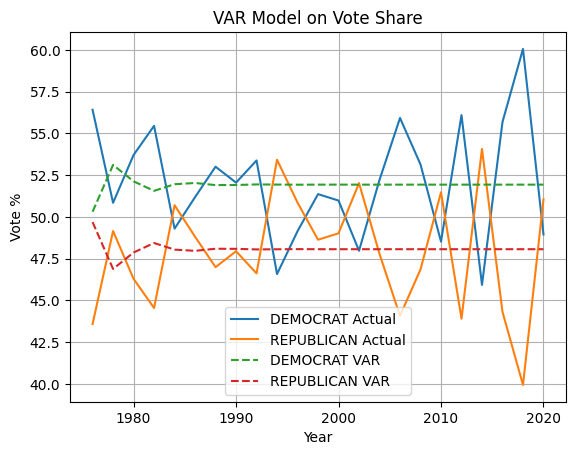

In [6]:
plt.plot(vote_df.index, vote_df['DEMOCRAT_pct'], label='DEMOCRAT Actual')
plt.plot(vote_df.index, vote_df['REPUBLICAN_pct'], label='REPUBLICAN Actual')
plt.plot(vote_df.index, forecast_df['DEMOCRAT_forecast'], '--', label='DEMOCRAT VAR')
plt.plot(vote_df.index, forecast_df['REPUBLICAN_forecast'], '--', label='REPUBLICAN VAR')
plt.title("VAR Model on Vote Share")
plt.xlabel("Year")
plt.ylabel("Vote %")
plt.legend()
plt.grid(True)
plt.show()